# Peaks and valleys

Picking up where I left off, but tidying things up a bit. In the [last notebook](https://michellejw.github.io/sugar/jupyter/2023/02/18/data_part01.html) I included a function for loading data. To streamline things, I created a module for reading Glooko data that I can just load [glooko.py](https://github.com/michellejw/sugar/blob/main/tools/glooko.py).

I had left off looking at extracting peaks and troughs from the data, but after a very short google search I realized that, of course, there's already a function for doing that (duh). And it's in Scipy and seems very easy to use - [scipy.signal.argrelextrema](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html). It is really flexible and may not always give me exactly what I need but I think it's a decent place to start. 

In [59]:
# IMPORTS

# since this notebook lives in a sub-folder of the main project, I'll add the main folder to the python path
import sys
sys.path.append("../")

# Load my module
from tools.glooko import read_all

# Load extra stuff that I need
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema

# Plotting (matplotlib widge allows for interactivity in the live notebook)
import matplotlib.pyplot as plt
%matplotlib widget


In [8]:
# LOAD DATA

df_cgm, df_bolus, df_basal, df_insulin = read_all(r"../data")

# Extract carb correction and insulin correction from bolus dataframe; add as new columns
df_bolus["carb_correction"] = np.divide(df_bolus["carbs_input"], df_bolus["carb_ratio"])
df_bolus["insulin_correction"] = df_bolus["insulin_delivered"] - df_bolus["carb_correction"]

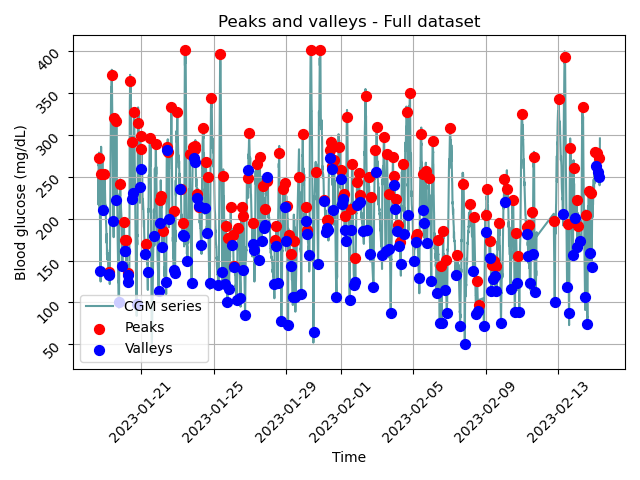

In [60]:
# GET MAXIMA AND MINIMA OF CGM DATA

# First, smooth the cgm time series (using a 1D Gaussian filter) so that we get cleaner max and mins.
g_filter = gaussian_filter1d(df_cgm['bg'],4)
df_cgm['bg_filt'] = g_filter

# Find peaks
peak_idx = argrelextrema(g_filter, np.greater)[0]

# Find valleys
valley_idx = argrelextrema(g_filter, np.less)[0]

fig, ax = plt.subplots(1,1)
ax.plot(df_cgm['time'], df_cgm['bg'], color='cadetblue', label='CGM series', zorder=1)
ax.scatter(df_cgm['time'][peak_idx], df_cgm['bg'][peak_idx], s=50, c='red', label='Peaks', zorder=2)
ax.scatter(df_cgm['time'][valley_idx], df_cgm['bg'][valley_idx], s=50, c='blue', label='Valleys', zorder=3)

ax.set_ylabel('Blood glucose (mg/dL)')
ax.set_xlabel('Time')
ax.tick_params(rotation=45)
ax.set_title('Peaks and valleys - Full dataset')
#ax.set_xlim([19402.098437682915, 19403.020563564292])
ax.grid()
ax.legend()

fig.tight_layout()

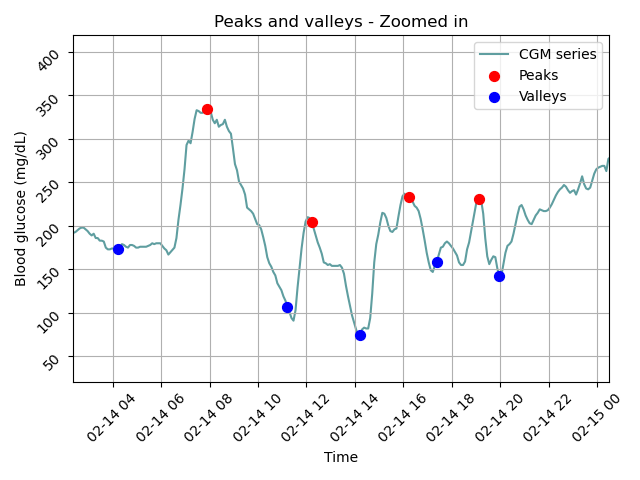

In [58]:
fig2, ax2 = plt.subplots(1,1)
ax2.plot(df_cgm['time'], df_cgm['bg'], color='cadetblue', label='CGM series', zorder = 1)
ax2.scatter(df_cgm['time'][peak_idx], df_cgm['bg'][peak_idx], s=50, c='red', label='Peaks', zorder = 2)
ax2.scatter(df_cgm['time'][valley_idx], df_cgm['bg'][valley_idx], s=50, c='blue', label='Valleys', zorder = 3)

ax2.set_ylabel('Blood glucose (mg/dL)')
ax2.set_xlabel('Time')
ax2.tick_params(rotation=45)
ax2.set_title('Peaks and valleys - Zoomed in')
ax2.set_xlim([19402.098437682915, 19403.020563564292])
ax2.grid()
ax2.legend()

fig2.tight_layout()